In [1]:
import os
import numpy as np
import system_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [2]:
m = 128
DATA_PATH = '../../../OneDrive - m.titech.ac.jp/Lab/data'
SystemMatrix = system_matrix.SystemMatrix(DATA_PATH, 'hadamard')
H = SystemMatrix.generate()
print(H.shape)
np.save(f"{DATA_PATH}/systemMatrix/H_matrix_true_RGB.npy", H)
print("System matrix saved")

Finished loading images
Finished loading images
Finished loading images
(49152, 12288)
System matrix saved


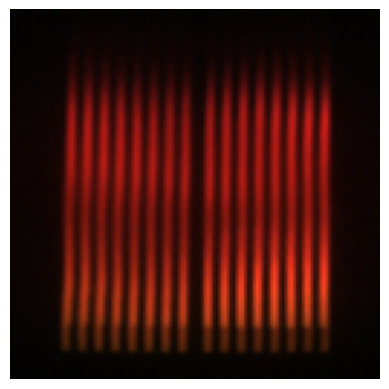

In [5]:
sample_image = Image.open(f"{DATA_PATH}/sample_image64/hadamard_32.png")
sample_image = np.asarray(sample_image).flatten()
sample_image = np.concatenate((sample_image, np.zeros(4096), np.zeros(4096)))

Hf = H @ sample_image
gr, gg, gb = np.split(Hf, 3)
gr = gr.reshape(m, m)
gg = gg.reshape(m, m)
gb = gb.reshape(m, m)
gr = np.clip(gr, 0, 1)
gg = np.clip(gg, 0, 1)
gb = np.clip(gb, 0, 1)
Hf_img = np.dstack((gr, gg, gb)) * 255
Hf_pil = Image.fromarray((Hf_img).astype(np.uint8))

# plt.figure(figsize=(8, 10))
# sns.heatmap(H[0:16384,0:4096], annot=False, cmap='viridis')

plt.imshow(Hf_pil)
plt.axis('off')
plt.show()